# Wifi Locationing

### Import Modules

In [152]:
# imports

# numpy, pandas, scipy, math, matplotlib
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from pandas.plotting import scatter_matrix
from sklearn.model_selection import train_test_split

import scipy
from math import sqrt
import seaborn as sns

# # estimators
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier


# # model metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

# cross validation
from sklearn.model_selection import train_test_split

# Ignore Future Warnings (FutureWarning)
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


### Import and Evaluate the Data 

In [4]:
# Loading data

WiFiTrainingData = pd.read_csv('trainingData.csv', header=0)

WiFiTrainingData

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,100,100,100,100,100,100,100,100,100,100,...,100,-7541.2643,4.864921e+06,2,1,106,2,2,23,1371713733
1,100,100,100,100,100,100,100,100,100,100,...,100,-7536.6212,4.864934e+06,2,1,106,2,2,23,1371713691
2,100,100,100,100,100,100,100,-97,100,100,...,100,-7519.1524,4.864950e+06,2,1,103,2,2,23,1371714095
3,100,100,100,100,100,100,100,100,100,100,...,100,-7524.5704,4.864934e+06,2,1,102,2,2,23,1371713807
4,100,100,100,100,100,100,100,100,100,100,...,100,-7632.1436,4.864982e+06,0,0,122,2,11,13,1369909710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19932,100,100,100,100,100,100,100,100,100,100,...,100,-7485.4686,4.864875e+06,3,1,1,2,18,10,1371710683
19933,100,100,100,100,100,100,100,100,100,100,...,100,-7390.6206,4.864836e+06,1,2,140,2,18,10,1371710402
19934,100,100,100,100,100,100,100,100,100,100,...,100,-7516.8415,4.864889e+06,3,1,13,2,18,10,1371710921
19935,100,100,100,100,100,100,100,100,100,100,...,100,-7537.3219,4.864896e+06,3,1,113,2,18,10,1371711049


In [5]:
# Shape of the data

n_rows, n_cols  = WiFiTrainingData.shape
print('Number of columns: {}'.format(n_cols))
print('Number of rows: {}'.format(n_rows))


Number of columns: 529
Number of rows: 19937


In [6]:
# head() observations

WiFiTrainingData.head()


,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,100,100,100,100,100,100,100,100,100,100,...,100,-7541.2643,4.864921e+06,2,1,106,2,2,23,1371713733
1,100,100,100,100,100,100,100,100,100,100,...,100,-7536.6212,4.864934e+06,2,1,106,2,2,23,1371713691
2,100,100,100,100,100,100,100,-97,100,100,...,100,-7519.1524,4.864950e+06,2,1,103,2,2,23,1371714095
3,100,100,100,100,100,100,100,100,100,100,...,100,-7524.5704,4.864934e+06,2,1,102,2,2,23,1371713807
4,100,100,100,100,100,100,100,100,100,100,...,100,-7632.1436,4.864982e+06,0,0,122,2,11,13,1369909710


In [7]:
# tail() observations

WiFiTrainingData.tail()


,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
19932,100,100,100,100,100,100,100,100,100,100,...,100,-7485.4686,4.864875e+06,3,1,1,2,18,10,1371710683
19933,100,100,100,100,100,100,100,100,100,100,...,100,-7390.6206,4.864836e+06,1,2,140,2,18,10,1371710402
19934,100,100,100,100,100,100,100,100,100,100,...,100,-7516.8415,4.864889e+06,3,1,13,2,18,10,1371710921
19935,100,100,100,100,100,100,100,100,100,100,...,100,-7537.3219,4.864896e+06,3,1,113,2,18,10,1371711049
19936,100,100,100,100,100,100,100,100,100,100,...,100,-7536.1658,4.864898e+06,3,1,112,2,18,10,1371711025


In [8]:
# Examine structure of the data 

WiFiTrainingData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19937 entries, 0 to 19936
Columns: 529 entries, WAP001 to TIMESTAMP
dtypes: float64(2), int64(527)
memory usage: 80.5 MB


In [9]:
# Checking for NULL Values

if WiFiTrainingData is None:
    print('There are null values')
else:
    print('There are no null values')


There are no null values


In [10]:
WiFiTrainingData.round(4)

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,100,100,100,100,100,100,100,100,100,100,...,100,-7541.2643,4.864921e+06,2,1,106,2,2,23,1371713733
1,100,100,100,100,100,100,100,100,100,100,...,100,-7536.6212,4.864934e+06,2,1,106,2,2,23,1371713691
2,100,100,100,100,100,100,100,-97,100,100,...,100,-7519.1524,4.864950e+06,2,1,103,2,2,23,1371714095
3,100,100,100,100,100,100,100,100,100,100,...,100,-7524.5704,4.864934e+06,2,1,102,2,2,23,1371713807
4,100,100,100,100,100,100,100,100,100,100,...,100,-7632.1436,4.864982e+06,0,0,122,2,11,13,1369909710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19932,100,100,100,100,100,100,100,100,100,100,...,100,-7485.4686,4.864875e+06,3,1,1,2,18,10,1371710683
19933,100,100,100,100,100,100,100,100,100,100,...,100,-7390.6206,4.864836e+06,1,2,140,2,18,10,1371710402
19934,100,100,100,100,100,100,100,100,100,100,...,100,-7516.8415,4.864889e+06,3,1,13,2,18,10,1371710921
19935,100,100,100,100,100,100,100,100,100,100,...,100,-7537.3219,4.864896e+06,3,1,113,2,18,10,1371711049


In [11]:
# Get the columns name
# iterating the columns 

for col in WiFiTrainingData.columns: 
    print(col)
    

WAP001
WAP002
WAP003
WAP004
WAP005
WAP006
WAP007
WAP008
WAP009
WAP010
WAP011
WAP012
WAP013
WAP014
WAP015
WAP016
WAP017
WAP018
WAP019
WAP020
WAP021
WAP022
WAP023
WAP024
WAP025
WAP026
WAP027
WAP028
WAP029
WAP030
WAP031
WAP032
WAP033
WAP034
WAP035
WAP036
WAP037
WAP038
WAP039
WAP040
WAP041
WAP042
WAP043
WAP044
WAP045
WAP046
WAP047
WAP048
WAP049
WAP050
WAP051
WAP052
WAP053
WAP054
WAP055
WAP056
WAP057
WAP058
WAP059
WAP060
WAP061
WAP062
WAP063
WAP064
WAP065
WAP066
WAP067
WAP068
WAP069
WAP070
WAP071
WAP072
WAP073
WAP074
WAP075
WAP076
WAP077
WAP078
WAP079
WAP080
WAP081
WAP082
WAP083
WAP084
WAP085
WAP086
WAP087
WAP088
WAP089
WAP090
WAP091
WAP092
WAP093
WAP094
WAP095
WAP096
WAP097
WAP098
WAP099
WAP100
WAP101
WAP102
WAP103
WAP104
WAP105
WAP106
WAP107
WAP108
WAP109
WAP110
WAP111
WAP112
WAP113
WAP114
WAP115
WAP116
WAP117
WAP118
WAP119
WAP120
WAP121
WAP122
WAP123
WAP124
WAP125
WAP126
WAP127
WAP128
WAP129
WAP130
WAP131
WAP132
WAP133
WAP134
WAP135
WAP136
WAP137
WAP138
WAP139
WAP140
WAP141
WAP142
WAP143

In [12]:
# Check the type of each variables

for col in WiFiTrainingData.columns: 
    print(col, type(col))
    


WAP001 <class 'str'>
WAP002 <class 'str'>
WAP003 <class 'str'>
WAP004 <class 'str'>
WAP005 <class 'str'>
WAP006 <class 'str'>
WAP007 <class 'str'>
WAP008 <class 'str'>
WAP009 <class 'str'>
WAP010 <class 'str'>
WAP011 <class 'str'>
WAP012 <class 'str'>
WAP013 <class 'str'>
WAP014 <class 'str'>
WAP015 <class 'str'>
WAP016 <class 'str'>
WAP017 <class 'str'>
WAP018 <class 'str'>
WAP019 <class 'str'>
WAP020 <class 'str'>
WAP021 <class 'str'>
WAP022 <class 'str'>
WAP023 <class 'str'>
WAP024 <class 'str'>
WAP025 <class 'str'>
WAP026 <class 'str'>
WAP027 <class 'str'>
WAP028 <class 'str'>
WAP029 <class 'str'>
WAP030 <class 'str'>
WAP031 <class 'str'>
WAP032 <class 'str'>
WAP033 <class 'str'>
WAP034 <class 'str'>
WAP035 <class 'str'>
WAP036 <class 'str'>
WAP037 <class 'str'>
WAP038 <class 'str'>
WAP039 <class 'str'>
WAP040 <class 'str'>
WAP041 <class 'str'>
WAP042 <class 'str'>
WAP043 <class 'str'>
WAP044 <class 'str'>
WAP045 <class 'str'>
WAP046 <class 'str'>
WAP047 <class 'str'>
WAP048 <class

In [13]:
# Reviewing dataframe

summary = WiFiTrainingData.describe()
summary

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
count,19937.000000,19937.000000,19937.0,19937.0,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,...,19937.0,19937.000000,1.993700e+04,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,19937.000000,1.993700e+04
mean,99.823644,99.820936,100.0,100.0,99.613733,97.130461,94.733661,93.820234,94.693936,99.163766,...,100.0,-7464.275947,4.864871e+06,1.674575,1.212820,148.429954,1.833024,9.068014,13.021869,1.371421e+09
std,5.866842,5.798156,0.0,0.0,8.615657,22.931890,30.541335,33.010404,30.305084,12.634045,...,0.0,123.402010,6.693318e+01,1.223078,0.833139,58.342106,0.372964,4.988720,5.362410,5.572054e+05
min,-97.000000,-90.000000,100.0,100.0,-97.000000,-98.000000,-99.000000,-98.000000,-98.000000,-99.000000,...,100.0,-7691.338400,4.864746e+06,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.369909e+09
25%,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7594.737000,4.864821e+06,1.000000,0.000000,110.000000,2.000000,5.000000,8.000000,1.371056e+09
50%,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7423.060900,4.864852e+06,2.000000,1.000000,129.000000,2.000000,11.000000,13.000000,1.371716e+09
75%,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7359.193000,4.864930e+06,3.000000,2.000000,207.000000,2.000000,13.000000,14.000000,1.371721e+09
max,100.000000,100.000000,100.0,100.0,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000,...,100.0,-7300.818990,4.865017e+06,4.000000,2.000000,254.000000,2.000000,18.000000,24.000000,1.371738e+09


In [14]:
# Reviewing dataframe

summary.transpose()


,count,mean,std,min,25%,50%,75%,max
WAP001,19937.0,9.982364e+01,5.866842,-9.700000e+01,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
WAP002,19937.0,9.982094e+01,5.798156,-9.000000e+01,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
WAP003,19937.0,1.000000e+02,0.000000,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
WAP004,19937.0,1.000000e+02,0.000000,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
WAP005,19937.0,9.961373e+01,8.615657,-9.700000e+01,1.000000e+02,1.000000e+02,1.000000e+02,1.000000e+02
...,...,...,...,...,...,...,...,...
SPACEID,19937.0,1.484300e+02,58.342106,1.000000e+00,1.100000e+02,1.290000e+02,2.070000e+02,2.540000e+02
RELATIVEPOSITION,19937.0,1.833024e+00,0.372964,1.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00
USERID,19937.0,9.068014e+00,4.988720,1.000000e+00,5.000000e+00,1.100000e+01,1.300000e+01,1.800000e+01
PHONEID,19937.0,1.302187e+01,5.362410,1.000000e+00,8.000000e+00,1.300000e+01,1.400000e+01,2.400000e+01


In [15]:
# Creating backup 1 

WiFiTrainingData_bkp_1 = WiFiTrainingData


### Cleaning and Pre-processing

In [16]:
# Check unique values for categorical variables

print('Unique Values')
print('FLOOR ' + str(sorted(WiFiTrainingData['FLOOR'].unique())))
print('BUILDINGID ' + str(sorted(WiFiTrainingData['BUILDINGID'].unique())))
print('SPACEID ' + str(sorted(WiFiTrainingData['SPACEID'].unique())))
print('RELATIVEPOSITION ' + str(sorted(WiFiTrainingData['RELATIVEPOSITION'].unique())))
print('USERID ' + str(sorted(WiFiTrainingData['USERID'].unique())))
print('PHONEID ' + str(sorted(WiFiTrainingData['PHONEID'].unique())))


Unique Values
FLOOR [0, 1, 2, 3, 4]
BUILDINGID [0, 1, 2]
SPACEID [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 22, 25, 26, 27, 28, 29, 30, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 146, 147, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 253, 254]
RELATIVEPOSITION [1, 2]
USERID [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18]
PHONEID [1, 3, 6, 7, 8, 10, 11, 13, 14, 16, 17, 18, 19, 22, 23, 24]


In [17]:
# Find Duplicate Rows

duplicateRows = WiFiTrainingData[WiFiTrainingData.duplicated()]
duplicateRows


,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
2907,100,100,100,100,100,100,100,100,100,100,...,100,-7408.338870,4.864812e+06,3,2,253,1,6,19,1371715396
2920,100,100,100,100,100,100,100,100,100,100,...,100,-7352.339700,4.864838e+06,4,2,113,2,6,19,1371719973
3215,100,100,100,100,100,100,100,100,100,100,...,100,-7352.339700,4.864838e+06,4,2,113,2,6,19,1371719975
6124,100,100,100,100,100,100,100,100,100,100,...,100,-7422.316300,4.864896e+06,3,1,203,2,9,14,1371716032
12160,100,100,100,100,100,100,100,100,100,100,...,100,-7500.175300,4.864880e+06,0,1,1,2,13,17,1371714657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18270,100,100,100,100,100,100,100,100,100,100,...,100,-7611.056500,4.864982e+06,0,0,120,2,1,14,1371038095
19360,100,100,100,100,100,100,100,100,100,100,...,100,-7526.499313,4.864893e+06,3,1,3,1,17,22,1371716250
19410,100,100,100,100,100,100,100,100,100,100,...,100,-7469.922400,4.864864e+06,3,1,6,2,17,22,1371715175
19430,100,100,100,100,100,100,100,100,100,100,...,100,-7469.922400,4.864864e+06,3,1,6,2,17,22,1371715175


In [18]:
# Create backup 2    <--- OK

WiFiTrainingData_bkp_2 = WiFiTrainingData

In [19]:
WiFiTrainingData_bkp_2

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,100,100,100,100,100,100,100,100,100,100,...,100,-7541.2643,4.864921e+06,2,1,106,2,2,23,1371713733
1,100,100,100,100,100,100,100,100,100,100,...,100,-7536.6212,4.864934e+06,2,1,106,2,2,23,1371713691
2,100,100,100,100,100,100,100,-97,100,100,...,100,-7519.1524,4.864950e+06,2,1,103,2,2,23,1371714095
3,100,100,100,100,100,100,100,100,100,100,...,100,-7524.5704,4.864934e+06,2,1,102,2,2,23,1371713807
4,100,100,100,100,100,100,100,100,100,100,...,100,-7632.1436,4.864982e+06,0,0,122,2,11,13,1369909710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19932,100,100,100,100,100,100,100,100,100,100,...,100,-7485.4686,4.864875e+06,3,1,1,2,18,10,1371710683
19933,100,100,100,100,100,100,100,100,100,100,...,100,-7390.6206,4.864836e+06,1,2,140,2,18,10,1371710402
19934,100,100,100,100,100,100,100,100,100,100,...,100,-7516.8415,4.864889e+06,3,1,13,2,18,10,1371710921
19935,100,100,100,100,100,100,100,100,100,100,...,100,-7537.3219,4.864896e+06,3,1,113,2,18,10,1371711049


In [37]:
# WiFiTrainingData = WiFiTrainingData_bkp_2

In [38]:
WiFiTrainingData

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,100,100,100,100,100,100,100,100,100,100,...,100,-7541.2643,4.864921e+06,2,1,106,2,2,23,1371713733
1,100,100,100,100,100,100,100,100,100,100,...,100,-7536.6212,4.864934e+06,2,1,106,2,2,23,1371713691
2,100,100,100,100,100,100,100,-97,100,100,...,100,-7519.1524,4.864950e+06,2,1,103,2,2,23,1371714095
3,100,100,100,100,100,100,100,100,100,100,...,100,-7524.5704,4.864934e+06,2,1,102,2,2,23,1371713807
4,100,100,100,100,100,100,100,100,100,100,...,100,-7632.1436,4.864982e+06,0,0,122,2,11,13,1369909710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19932,100,100,100,100,100,100,100,100,100,100,...,100,-7485.4686,4.864875e+06,3,1,1,2,18,10,1371710683
19933,100,100,100,100,100,100,100,100,100,100,...,100,-7390.6206,4.864836e+06,1,2,140,2,18,10,1371710402
19934,100,100,100,100,100,100,100,100,100,100,...,100,-7516.8415,4.864889e+06,3,1,13,2,18,10,1371710921
19935,100,100,100,100,100,100,100,100,100,100,...,100,-7537.3219,4.864896e+06,3,1,113,2,18,10,1371711049


In [39]:
# Get the unique values (rows)

WiFiTrainingData = WiFiTrainingData.drop_duplicates()
WiFiTrainingData


,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,100,100,100,100,100,100,100,100,100,100,...,100,-7541.2643,4.864921e+06,2,1,106,2,2,23,1371713733
1,100,100,100,100,100,100,100,100,100,100,...,100,-7536.6212,4.864934e+06,2,1,106,2,2,23,1371713691
2,100,100,100,100,100,100,100,-97,100,100,...,100,-7519.1524,4.864950e+06,2,1,103,2,2,23,1371714095
3,100,100,100,100,100,100,100,100,100,100,...,100,-7524.5704,4.864934e+06,2,1,102,2,2,23,1371713807
4,100,100,100,100,100,100,100,100,100,100,...,100,-7632.1436,4.864982e+06,0,0,122,2,11,13,1369909710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19932,100,100,100,100,100,100,100,100,100,100,...,100,-7485.4686,4.864875e+06,3,1,1,2,18,10,1371710683
19933,100,100,100,100,100,100,100,100,100,100,...,100,-7390.6206,4.864836e+06,1,2,140,2,18,10,1371710402
19934,100,100,100,100,100,100,100,100,100,100,...,100,-7516.8415,4.864889e+06,3,1,13,2,18,10,1371710921
19935,100,100,100,100,100,100,100,100,100,100,...,100,-7537.3219,4.864896e+06,3,1,113,2,18,10,1371711049


In [40]:
# Create backup 3 - 19300 observations (removed duplicates) 

WiFiTrainingData_bkp_3 = WiFiTrainingData


In [41]:
WiFiTrainingData_bkp_3

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,100,100,100,100,100,100,100,100,100,100,...,100,-7541.2643,4.864921e+06,2,1,106,2,2,23,1371713733
1,100,100,100,100,100,100,100,100,100,100,...,100,-7536.6212,4.864934e+06,2,1,106,2,2,23,1371713691
2,100,100,100,100,100,100,100,-97,100,100,...,100,-7519.1524,4.864950e+06,2,1,103,2,2,23,1371714095
3,100,100,100,100,100,100,100,100,100,100,...,100,-7524.5704,4.864934e+06,2,1,102,2,2,23,1371713807
4,100,100,100,100,100,100,100,100,100,100,...,100,-7632.1436,4.864982e+06,0,0,122,2,11,13,1369909710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19932,100,100,100,100,100,100,100,100,100,100,...,100,-7485.4686,4.864875e+06,3,1,1,2,18,10,1371710683
19933,100,100,100,100,100,100,100,100,100,100,...,100,-7390.6206,4.864836e+06,1,2,140,2,18,10,1371710402
19934,100,100,100,100,100,100,100,100,100,100,...,100,-7516.8415,4.864889e+06,3,1,13,2,18,10,1371710921
19935,100,100,100,100,100,100,100,100,100,100,...,100,-7537.3219,4.864896e+06,3,1,113,2,18,10,1371711049


In [42]:
WiFiTrainingData

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,100,100,100,100,100,100,100,100,100,100,...,100,-7541.2643,4.864921e+06,2,1,106,2,2,23,1371713733
1,100,100,100,100,100,100,100,100,100,100,...,100,-7536.6212,4.864934e+06,2,1,106,2,2,23,1371713691
2,100,100,100,100,100,100,100,-97,100,100,...,100,-7519.1524,4.864950e+06,2,1,103,2,2,23,1371714095
3,100,100,100,100,100,100,100,100,100,100,...,100,-7524.5704,4.864934e+06,2,1,102,2,2,23,1371713807
4,100,100,100,100,100,100,100,100,100,100,...,100,-7632.1436,4.864982e+06,0,0,122,2,11,13,1369909710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19932,100,100,100,100,100,100,100,100,100,100,...,100,-7485.4686,4.864875e+06,3,1,1,2,18,10,1371710683
19933,100,100,100,100,100,100,100,100,100,100,...,100,-7390.6206,4.864836e+06,1,2,140,2,18,10,1371710402
19934,100,100,100,100,100,100,100,100,100,100,...,100,-7516.8415,4.864889e+06,3,1,13,2,18,10,1371710921
19935,100,100,100,100,100,100,100,100,100,100,...,100,-7537.3219,4.864896e+06,3,1,113,2,18,10,1371711049


In [32]:
# Restore Backup 3

# WiFiTrainingData = WiFiTrainingData_bkp_3

In [43]:
WiFiTrainingData

,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,100,100,100,100,100,100,100,100,100,100,...,100,-7541.2643,4.864921e+06,2,1,106,2,2,23,1371713733
1,100,100,100,100,100,100,100,100,100,100,...,100,-7536.6212,4.864934e+06,2,1,106,2,2,23,1371713691
2,100,100,100,100,100,100,100,-97,100,100,...,100,-7519.1524,4.864950e+06,2,1,103,2,2,23,1371714095
3,100,100,100,100,100,100,100,100,100,100,...,100,-7524.5704,4.864934e+06,2,1,102,2,2,23,1371713807
4,100,100,100,100,100,100,100,100,100,100,...,100,-7632.1436,4.864982e+06,0,0,122,2,11,13,1369909710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19932,100,100,100,100,100,100,100,100,100,100,...,100,-7485.4686,4.864875e+06,3,1,1,2,18,10,1371710683
19933,100,100,100,100,100,100,100,100,100,100,...,100,-7390.6206,4.864836e+06,1,2,140,2,18,10,1371710402
19934,100,100,100,100,100,100,100,100,100,100,...,100,-7516.8415,4.864889e+06,3,1,13,2,18,10,1371710921
19935,100,100,100,100,100,100,100,100,100,100,...,100,-7537.3219,4.864896e+06,3,1,113,2,18,10,1371711049


In [44]:
# Change WAP values so that no signal is 0 and highest signal is 104
# Training Data

WiFiTrainingData.iloc[:, 0:520] = np.where(WiFiTrainingData.iloc[:, 0:520] <= 0, 
                WiFiTrainingData.iloc[:, 0:520] + 105, 
                WiFiTrainingData.iloc[:, 0:520] - 100)


In [45]:
# Verifying dataframe values

WiFiTrainingData


,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
0,0,0,0,0,0,0,0,0,0,0,...,0,-7541.2643,4.864921e+06,2,1,106,2,2,23,1371713733
1,0,0,0,0,0,0,0,0,0,0,...,0,-7536.6212,4.864934e+06,2,1,106,2,2,23,1371713691
2,0,0,0,0,0,0,0,8,0,0,...,0,-7519.1524,4.864950e+06,2,1,103,2,2,23,1371714095
3,0,0,0,0,0,0,0,0,0,0,...,0,-7524.5704,4.864934e+06,2,1,102,2,2,23,1371713807
4,0,0,0,0,0,0,0,0,0,0,...,0,-7632.1436,4.864982e+06,0,0,122,2,11,13,1369909710
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19932,0,0,0,0,0,0,0,0,0,0,...,0,-7485.4686,4.864875e+06,3,1,1,2,18,10,1371710683
19933,0,0,0,0,0,0,0,0,0,0,...,0,-7390.6206,4.864836e+06,1,2,140,2,18,10,1371710402
19934,0,0,0,0,0,0,0,0,0,0,...,0,-7516.8415,4.864889e+06,3,1,13,2,18,10,1371710921
19935,0,0,0,0,0,0,0,0,0,0,...,0,-7537.3219,4.864896e+06,3,1,113,2,18,10,1371711049


### Visualizing the Data

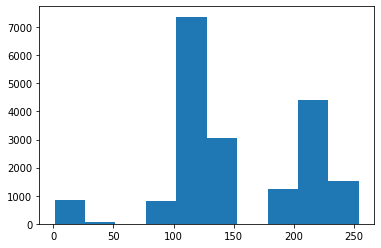

In [46]:
# Histogram of 'BUILDINGID'

plt.hist(WiFiTrainingData['SPACEID'])
plt.show()


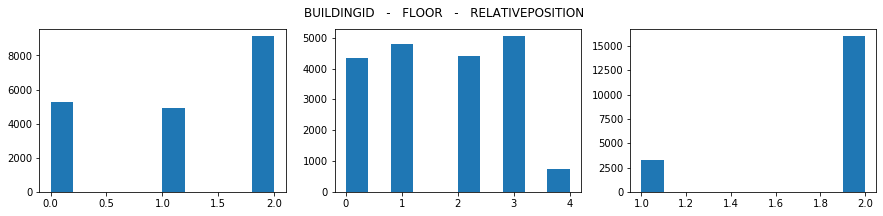

In [47]:
# Visualizing BUILDINGID, FLOOR and RELATIVEPOSITION

plt.figure(figsize=(15, 3))

plt.subplot(131)
plt.hist(WiFiTrainingData['BUILDINGID'])
plt.subplot(132)
plt.hist(WiFiTrainingData['FLOOR'])
plt.subplot(133)
plt.hist(WiFiTrainingData['RELATIVEPOSITION'])
plt.suptitle('BUILDINGID   -   FLOOR   -   RELATIVEPOSITION')
plt.show()


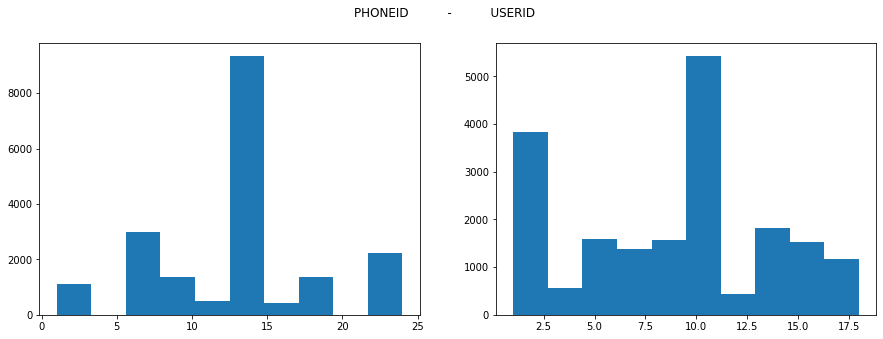

In [48]:
# Visualizing PHONEID and USERID

plt.figure(figsize=(15, 5))

plt.subplot(121)
plt.hist(WiFiTrainingData['PHONEID'])
plt.subplot(122)
plt.hist(WiFiTrainingData['USERID'])
plt.suptitle('PHONEID          -          USERID')
plt.show()


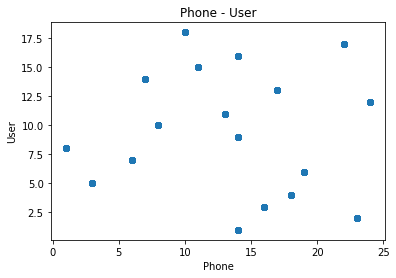

In [49]:
# Scatter plots

x = WiFiTrainingData['PHONEID']
y = WiFiTrainingData['USERID']
plt.scatter(x,y)
plt.title("Phone - User")
plt.xlabel("Phone")
plt.ylabel("User")
plt.show()


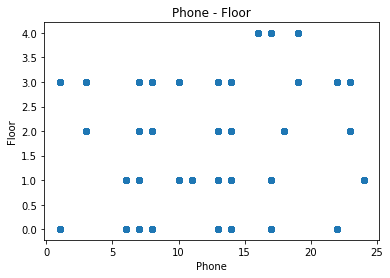

In [50]:
# Scatter plots

x = WiFiTrainingData['PHONEID']
y = WiFiTrainingData['FLOOR']
plt.scatter(x,y)
plt.title("Phone - Floor")
plt.xlabel("Phone")
plt.ylabel("Floor")
plt.show()

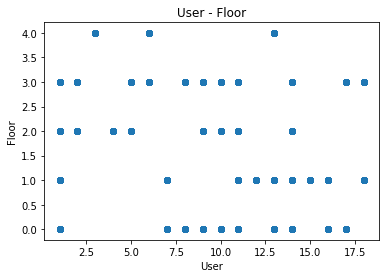

In [51]:
# Scatter plots

x = WiFiTrainingData['USERID']
y = WiFiTrainingData['FLOOR']
plt.scatter(x,y)
plt.title("User - Floor")
plt.xlabel("User")
plt.ylabel("Floor")
plt.show()


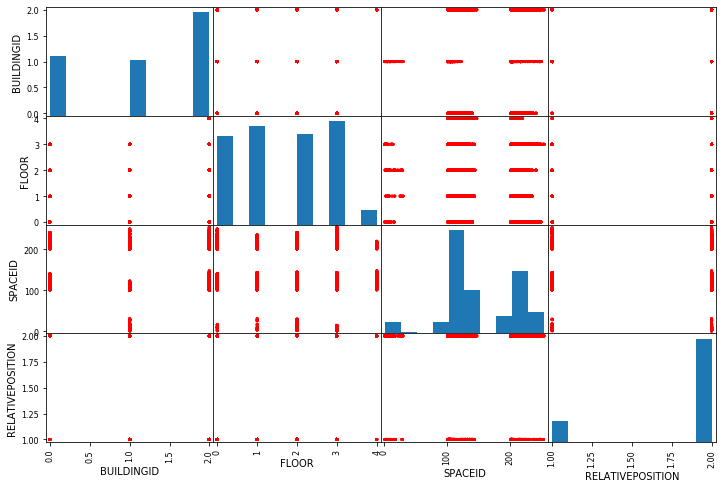

In [106]:
# Plot - Scatter Matrix

attributes = ["BUILDINGID", "FLOOR", "SPACEID", "RELATIVEPOSITION"]
scatter_matrix(WiFiTrainingData[attributes], figsize=(12, 8), color='red')
plt.savefig('Scatter_Matrix_1.png')


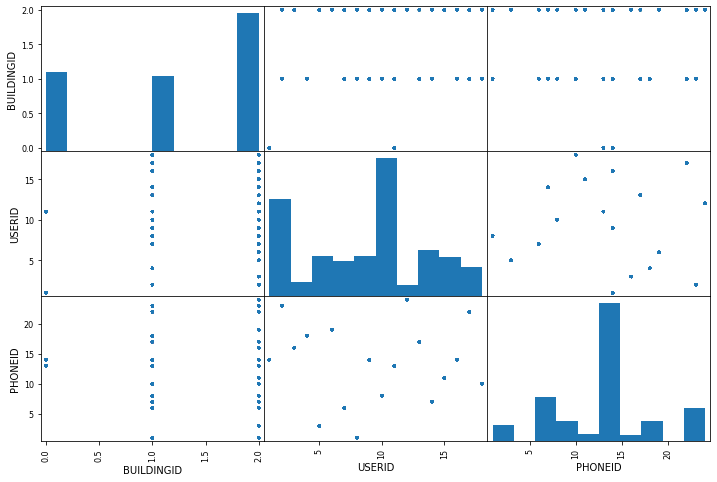

In [59]:
# Plot - Scatter Matrix

attributes = ["BUILDINGID", "USERID", "PHONEID"]
scatter_matrix(WiFiTrainingData[attributes], figsize=(12, 8))
plt.savefig('Scatter_Matrix_2.png')


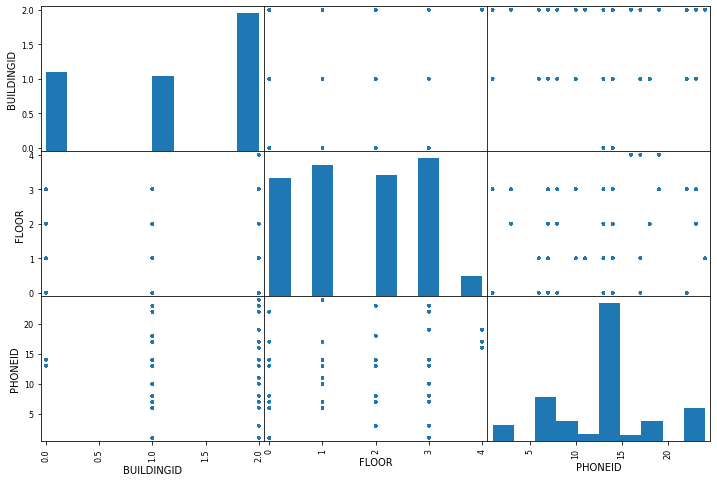

In [60]:
# Plot - Scatter Matrix

attributes = ["BUILDINGID", "FLOOR", "PHONEID"]
scatter_matrix(WiFiTrainingData[attributes], figsize=(12, 8))
plt.savefig('Scatter_Matrix_3.png')


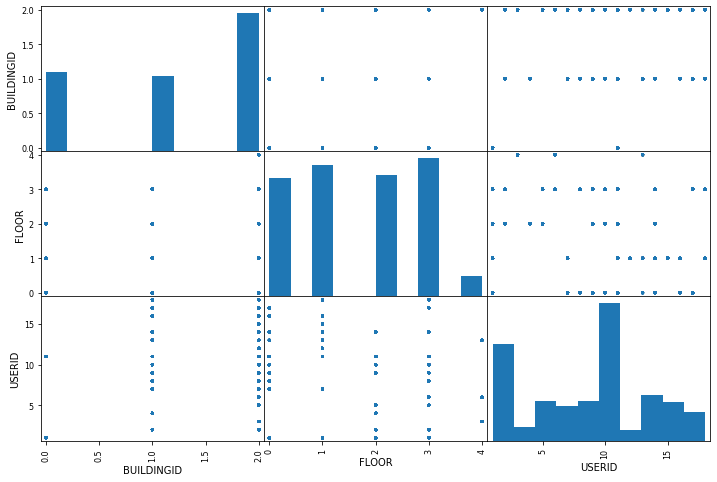

In [61]:
# Plot - Scatter Matrix

attributes = ["BUILDINGID", "FLOOR", "USERID"]
scatter_matrix(WiFiTrainingData[attributes], figsize=(12, 8))
plt.savefig('Scatter_Matrix_4.png')


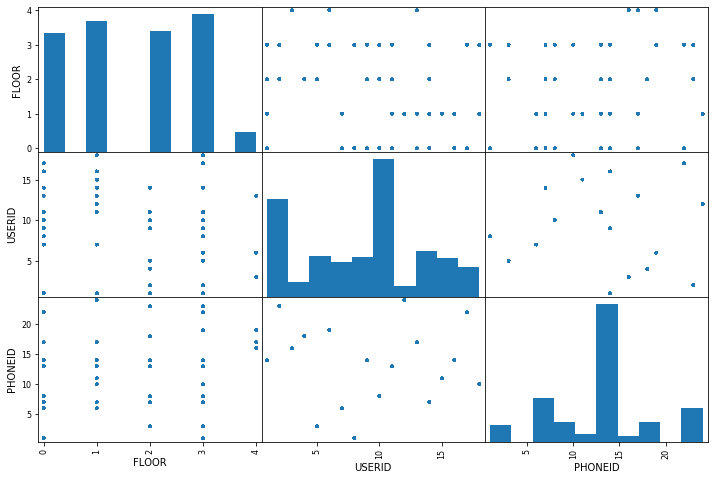

In [62]:
# Plot - Scatter Matrix

attributes = ["FLOOR", "USERID", "PHONEID"]
scatter_matrix(WiFiTrainingData[attributes], figsize=(12, 8))
plt.savefig('Scatter_Matrix_5.png')


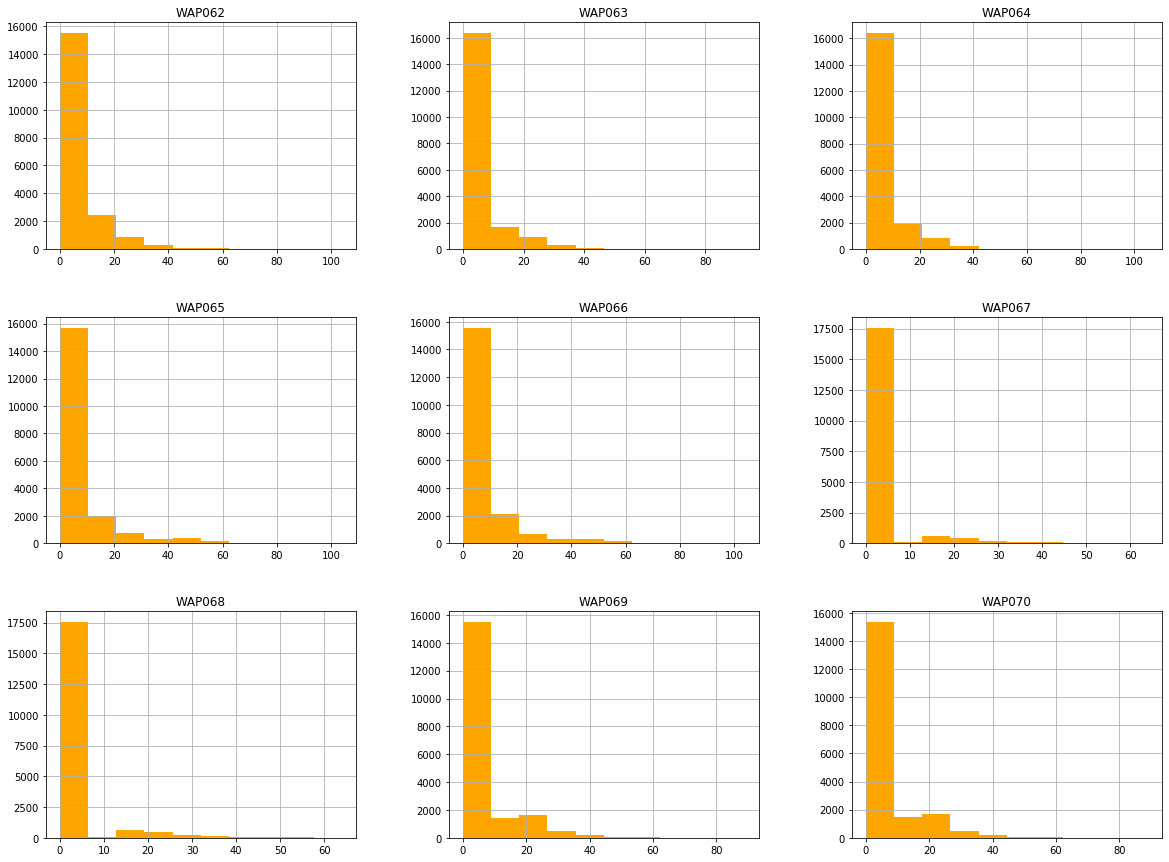

In [103]:
# plot histograms - Range of WAPs 62 to 70

WiFiTrainingData.iloc[:, 61:70].hist(figsize=(20,15), color='orange')
plt.savefig("attribute_histogram_plots")
plt.show()

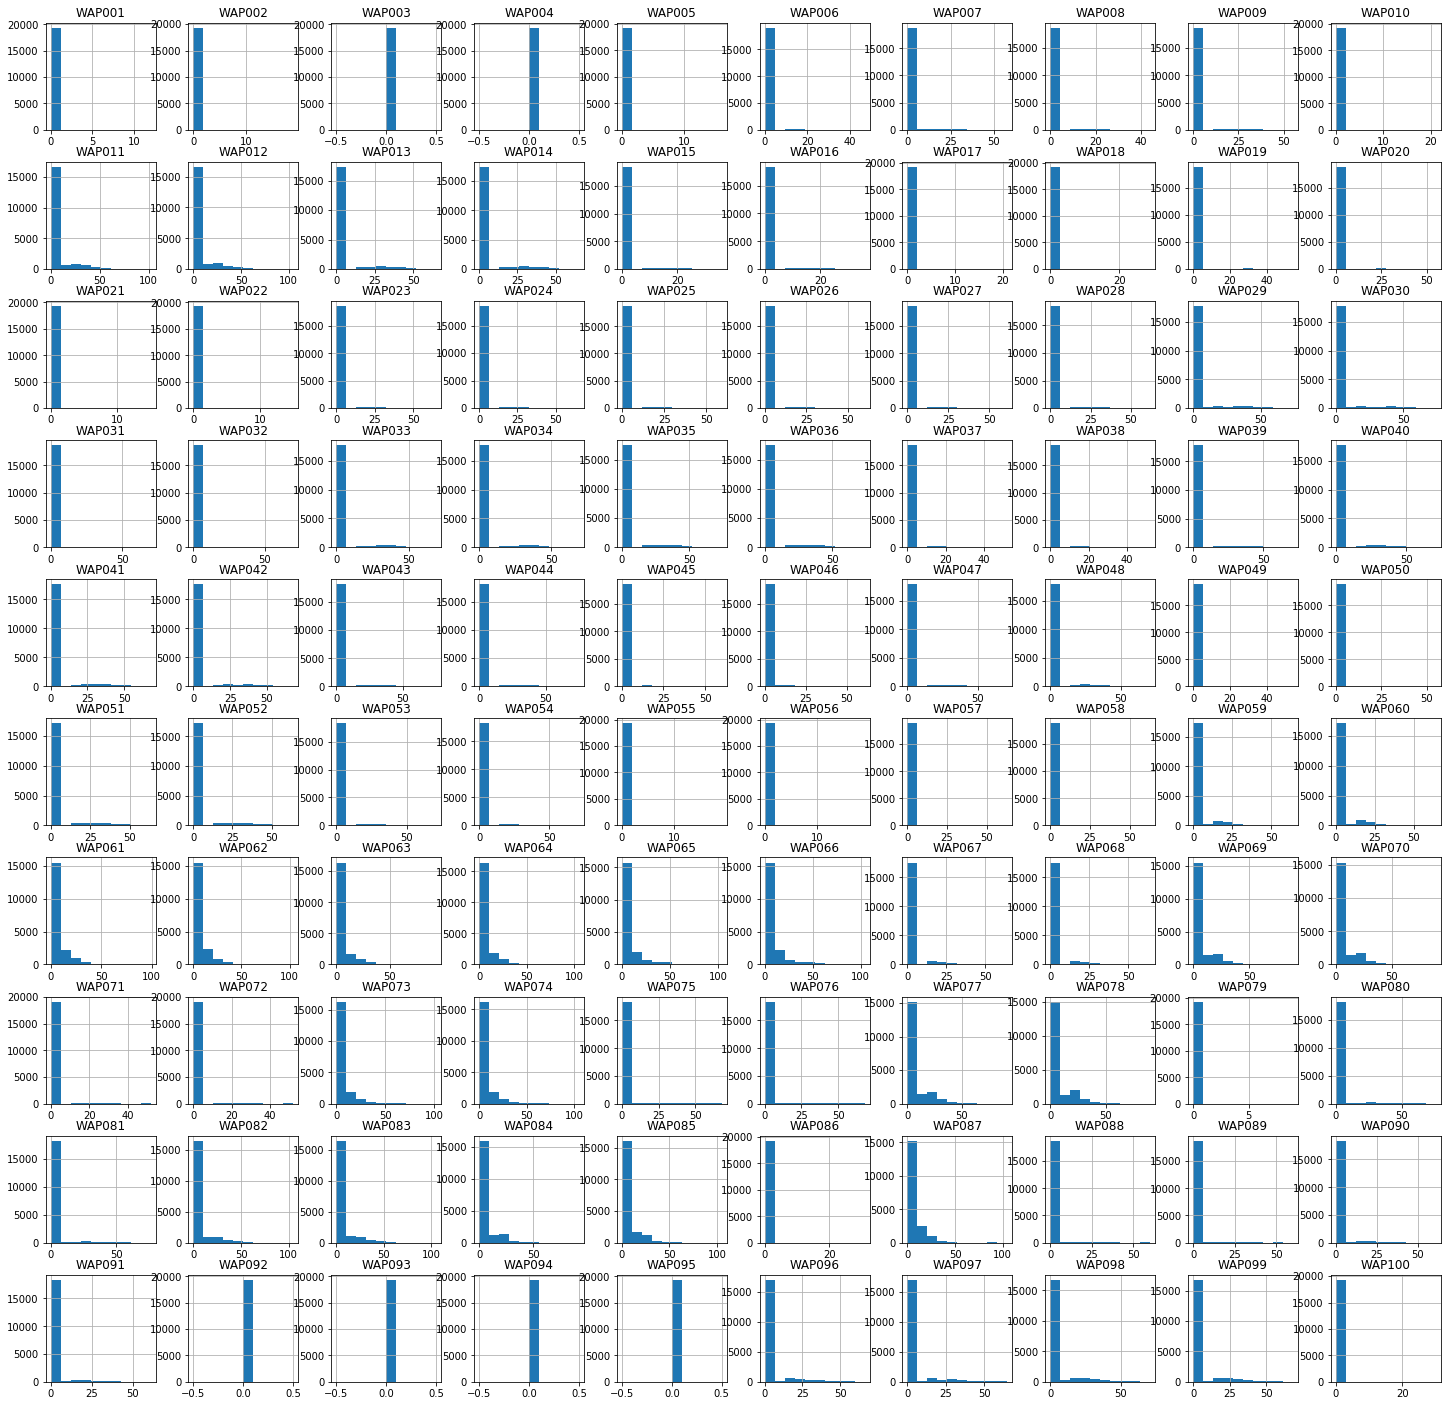

In [99]:
# plot histograms - WAPs 1

WiFiTrainingData.iloc[:, 0:100].hist(figsize=(25,25))
plt.savefig("WAPs_histogram_plots_1")
plt.show()


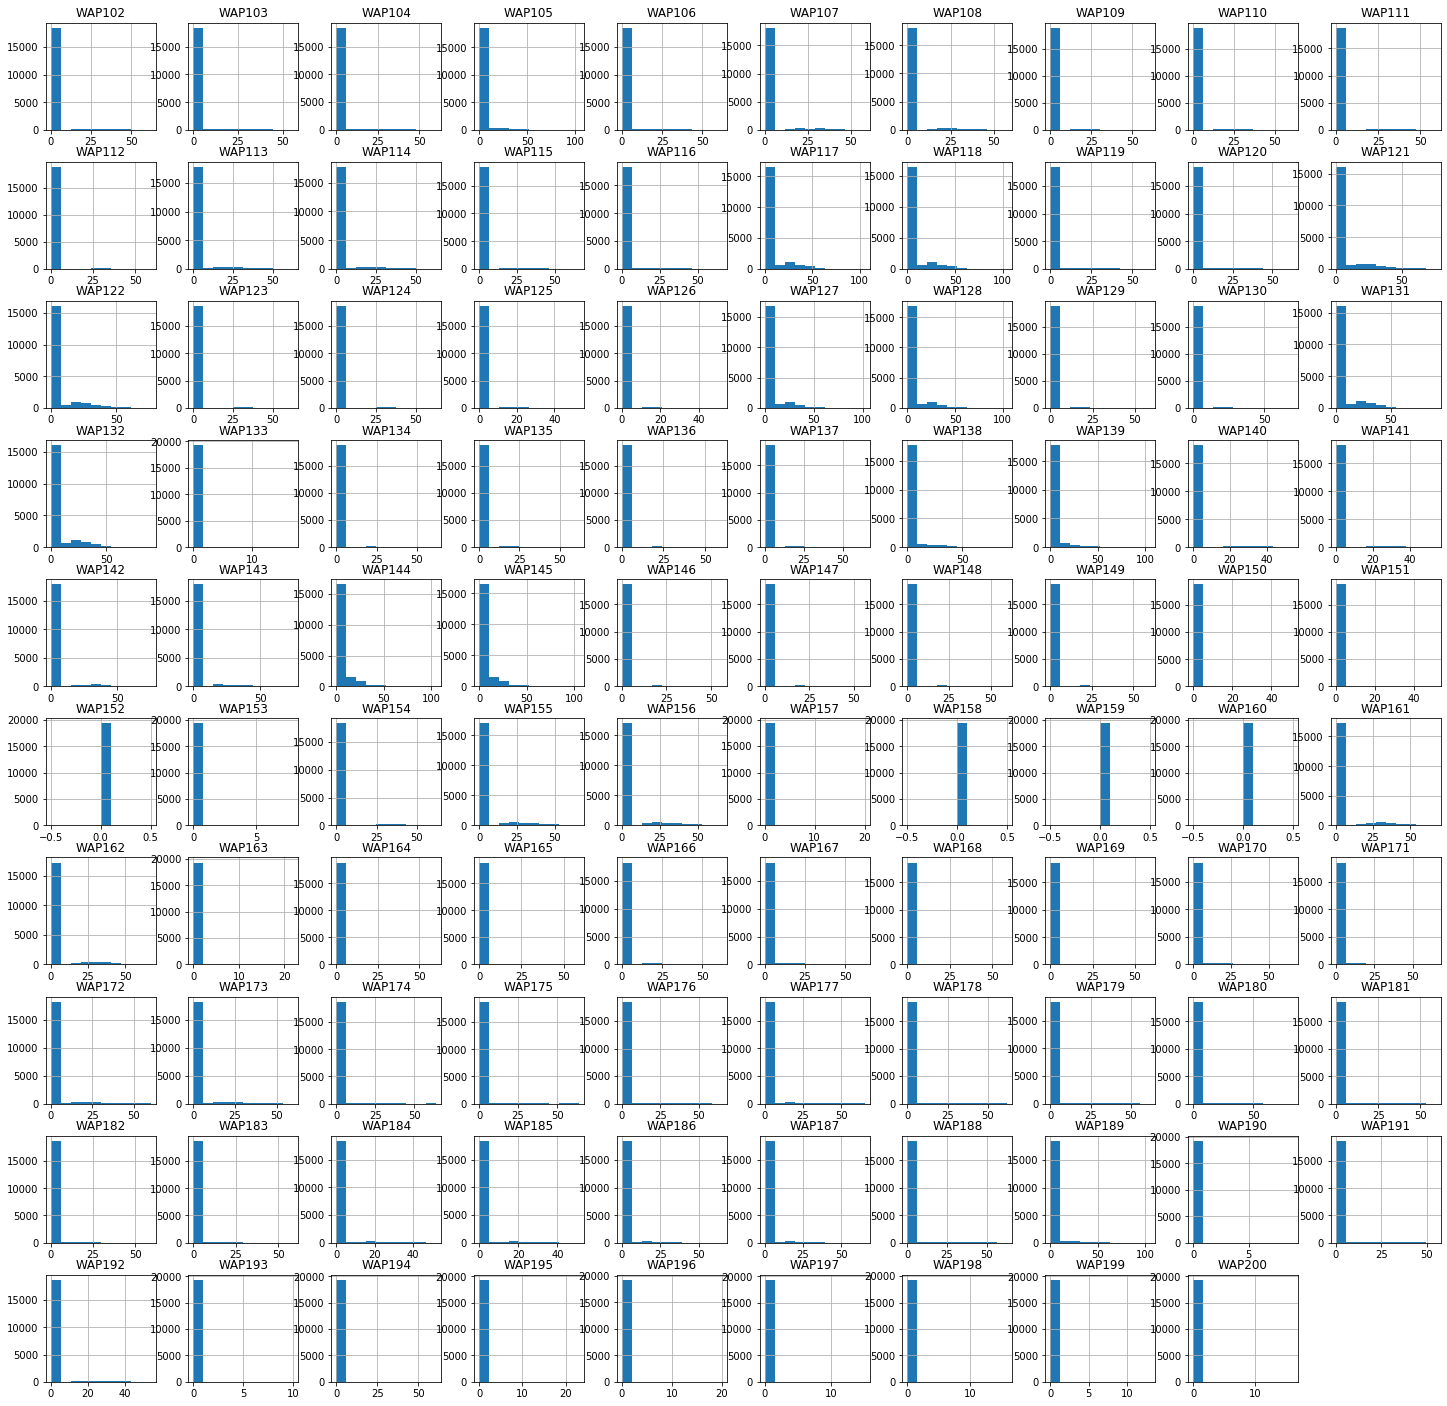

In [100]:
# plot histograms - WAPs 2

WiFiTrainingData.iloc[:, 101:200].hist(figsize=(25,25))
plt.savefig("WAPs_histogram_plots_2")
plt.show()


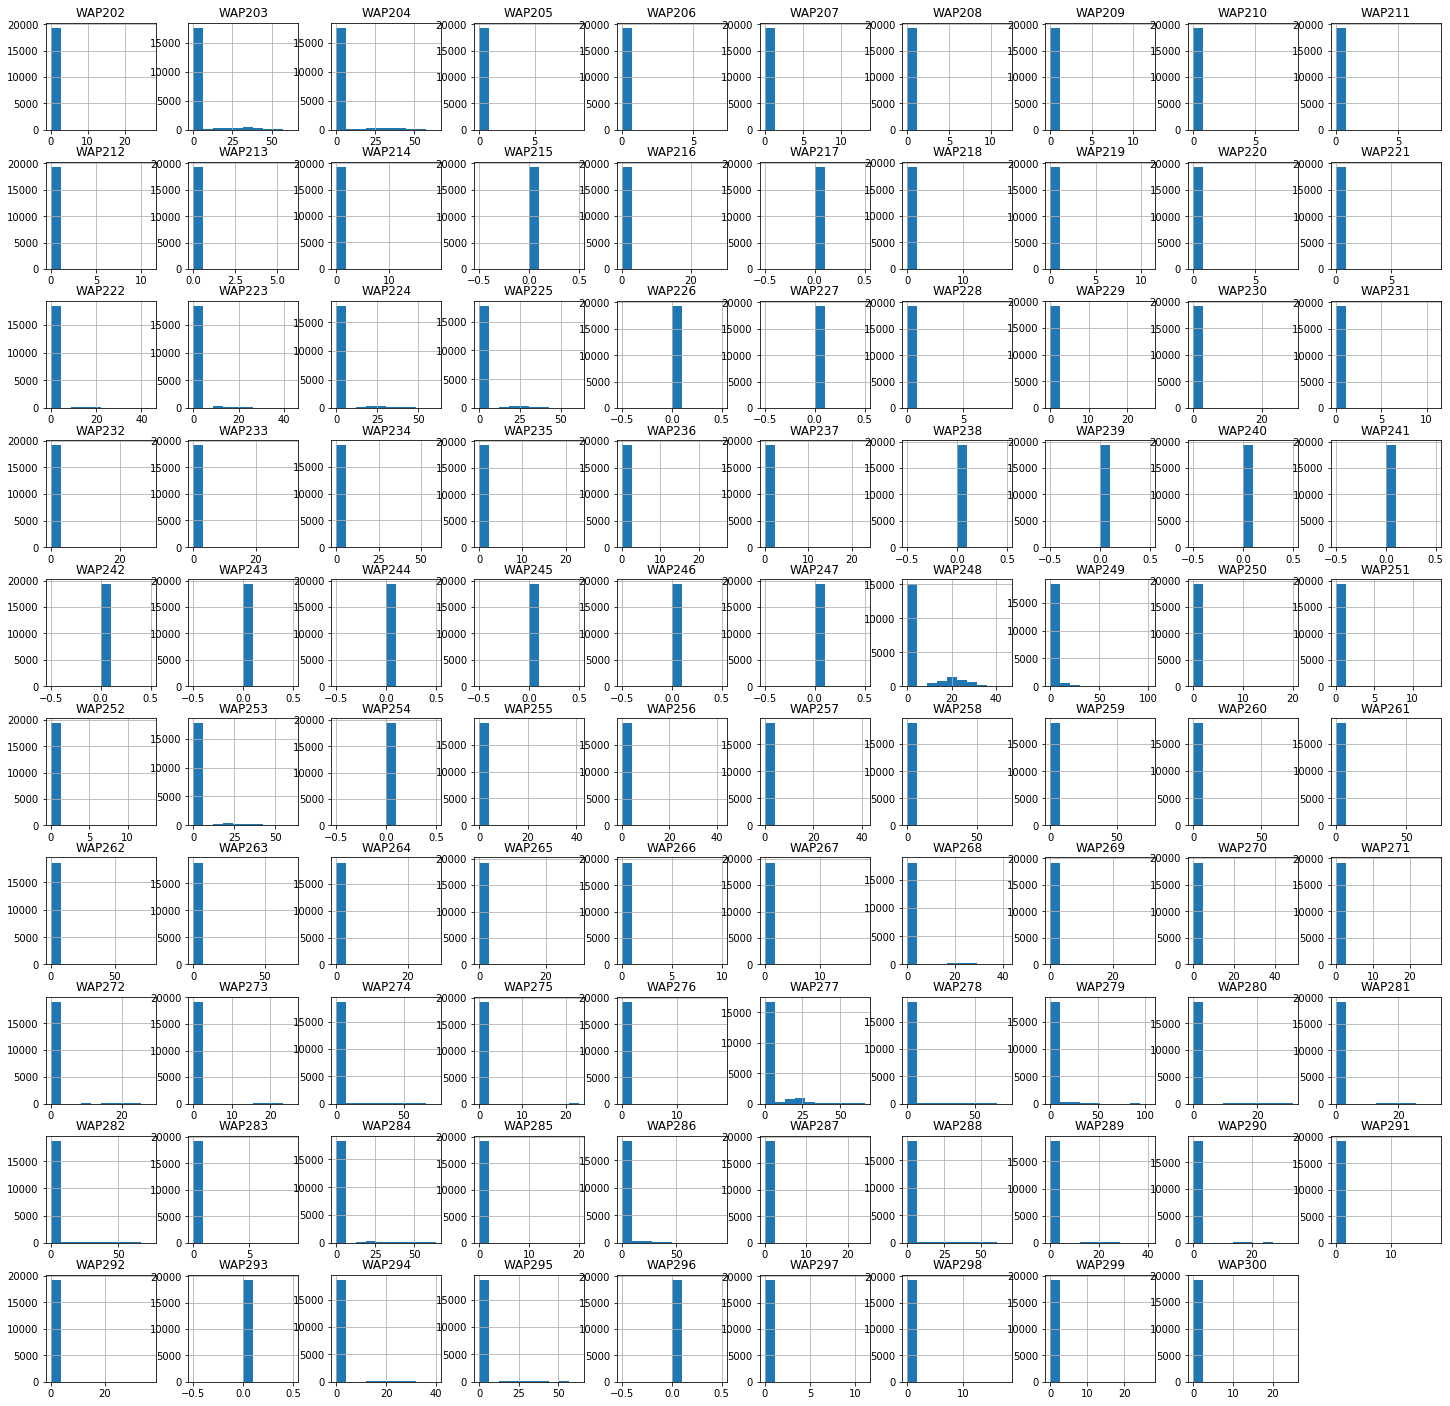

In [101]:
# plot histograms - WAPs 3

WiFiTrainingData.iloc[:, 201:300].hist(figsize=(25,25))
plt.savefig("WAPs_histogram_plots_3")
plt.show()


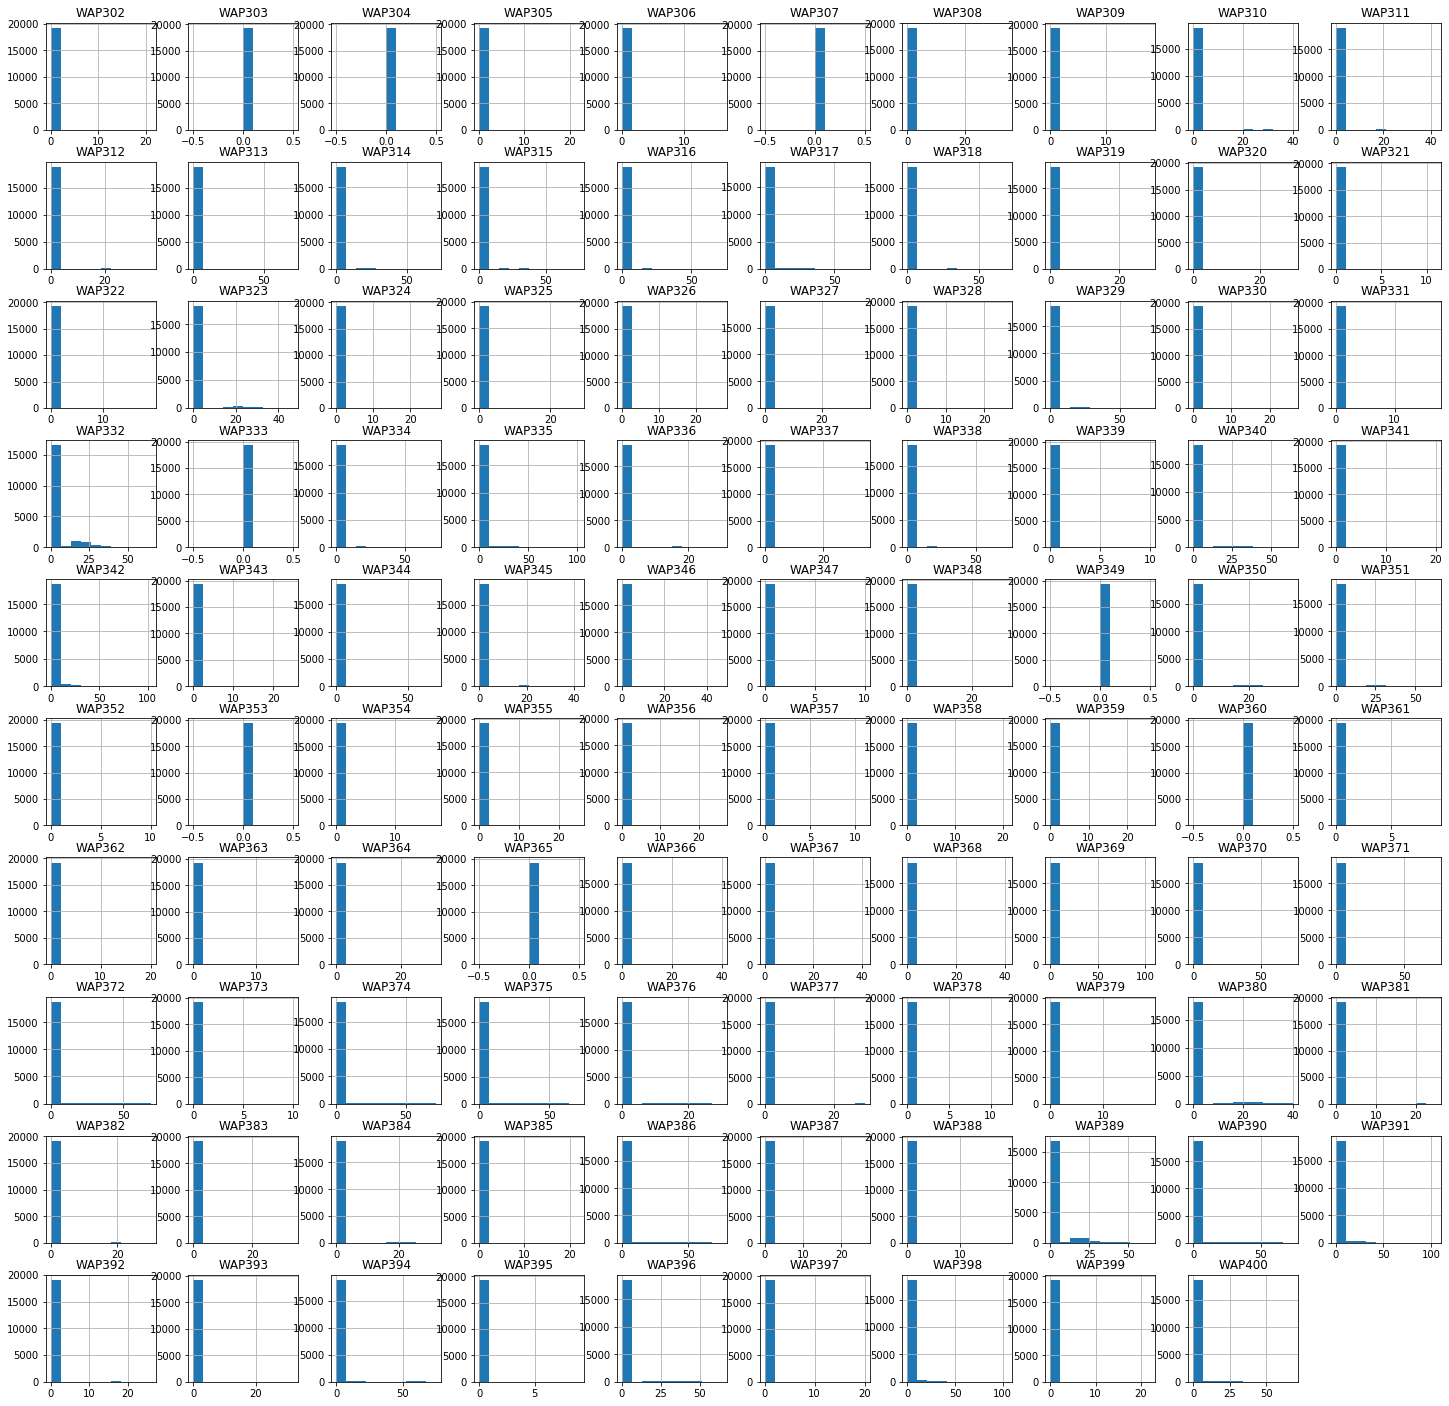

In [97]:
# plot histograms - WAPs 4

WiFiTrainingData.iloc[:, 301:400].hist(figsize=(25,25))
plt.savefig("WAPs_histogram_plots_4")
plt.show()


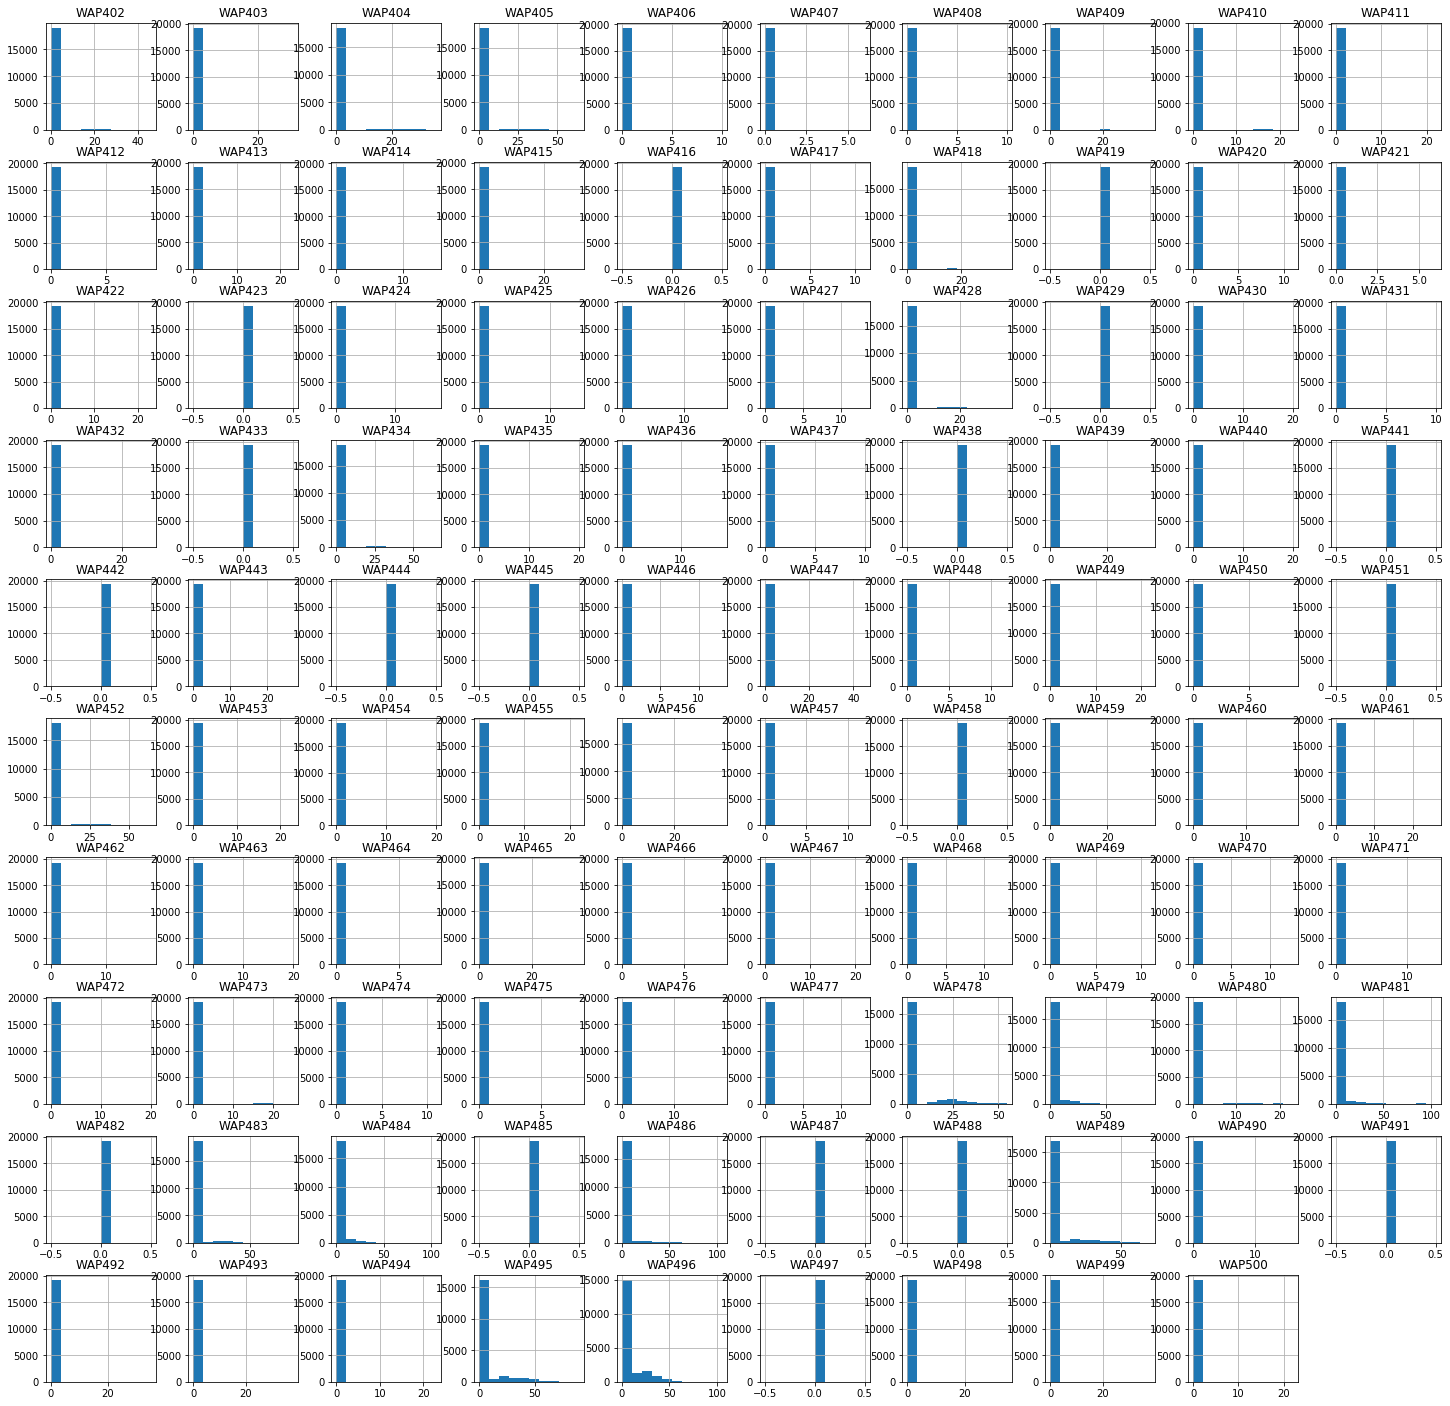

In [96]:
# plot histograms - WAPs 5

WiFiTrainingData.iloc[:, 401:500].hist(figsize=(25,25))
plt.savefig("WAPs_histogram_plots_5")
plt.show()


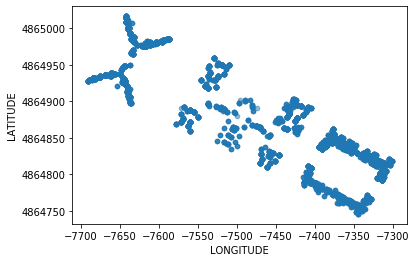

In [64]:
#Map the data i.e. see the campus
# Plot Longitud and Latitud
WiFiTrainingData.plot(kind="scatter", x="LONGITUDE", y="LATITUDE", alpha=0.2)
#plt.savefig('data_map.png')


### Subsets


In [108]:
# Creating Subsets

In [109]:
# Subset of building 0

WiFiTrainingDataB0 = WiFiTrainingData[WiFiTrainingData.BUILDINGID == 0]
WiFiTrainingDataB0.BUILDINGID


4        0
7119     0
7120     0
7121     0
7122     0
        ..
18492    0
18493    0
18494    0
18496    0
18497    0
Name: BUILDINGID, Length: 5246, dtype: int64

In [110]:
# Subset of building 1

WiFiTrainingDataB1 = WiFiTrainingData[WiFiTrainingData.BUILDINGID == 1]
WiFiTrainingDataB1.BUILDINGID


0        1
1        1
2        1
3        1
5        1
        ..
19930    1
19932    1
19934    1
19935    1
19936    1
Name: BUILDINGID, Length: 4938, dtype: int64

In [111]:
# Subset of building 2

WiFiTrainingDataB2 = WiFiTrainingData[WiFiTrainingData.BUILDINGID == 2]
WiFiTrainingDataB2.BUILDINGID
                                      

46       2
47       2
49       2
50       2
51       2
        ..
19926    2
19927    2
19928    2
19931    2
19933    2
Name: BUILDINGID, Length: 9116, dtype: int64

In [112]:
# Building 2 selected for modeling

In [113]:
# Subset of building 2 Floors 1 & 2

WiFiTrainingDataB2F1 = (WiFiTrainingDataB2[WiFiTrainingDataB2.FLOOR == 1]) 
WiFiTrainingDataB2F2 = (WiFiTrainingDataB2[WiFiTrainingDataB2.FLOOR == 2]) 

WiFiTrainingDataB2F12 = pd.concat([WiFiTrainingDataB2F1, WiFiTrainingDataB2F2])
WiFiTrainingDataB2F12


,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP520,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP
3322,0,0,0,0,0,0,0,0,0,0,...,0,-7391.930192,4.864841e+06,1,2,143,1,7,6,1371721411
3323,0,0,0,0,0,0,0,0,0,0,...,0,-7391.930192,4.864841e+06,1,2,143,1,7,6,1371721433
3325,0,0,0,0,0,0,0,0,0,0,...,0,-7390.184700,4.864839e+06,1,2,143,2,7,6,1371721372
3326,0,0,0,0,0,0,0,0,0,0,...,0,-7374.347500,4.864846e+06,1,2,115,2,7,6,1371721781
3327,0,0,0,0,0,0,0,0,0,0,...,0,-7374.897300,4.864856e+06,1,2,105,2,7,6,1371721745
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14417,0,0,0,0,0,0,0,0,0,0,...,0,-7374.347500,4.864846e+06,2,2,118,2,14,7,1371717064
14418,0,0,0,0,0,0,0,0,0,0,...,0,-7390.620600,4.864836e+06,2,2,143,2,14,7,1371717145
14419,0,0,0,0,0,0,0,0,0,0,...,0,-7394.797231,4.864838e+06,2,2,143,1,14,7,1371717198
14420,0,0,0,0,0,0,0,0,0,0,...,0,-7374.347500,4.864846e+06,2,2,118,2,14,7,1371717089


In [170]:
# Create backup 4 - Backup of WiFiTrainingDataB2F12 3739 observations (Building 2, Floors 1 & 2)

WiFiTrainingDataB2F12_bkp_4 = WiFiTrainingDataB2F12


In [193]:
# Creating dataframes BUILDINGID, FLOOR, SPACEID and RELATIVEPOSITION for LOCATIONID

BUILDINGID_df = WiFiTrainingDataB2F12.BUILDINGID
FLOOR_df = WiFiTrainingDataB2F12.FLOOR
SPACEID_df = WiFiTrainingDataB2F12.SPACEID
RELATIVEPOSITION_df = WiFiTrainingDataB2F12.RELATIVEPOSITION


In [205]:
# # create single unique identifier for each location in the dataset or sample
# Creating a Unique Location using BUILDINGID, FLOOR, SPACEID and RELATIVEPOSITION 

WiFiTrainingDataB2F12['LOCATIONID'] = BUILDINGID_df.astype(str)+'-'+FLOOR_df.astype(str)+'-'+SPACEID_df.astype(str)+'-'+RELATIVEPOSITION_df.astype(str)
WiFiTrainingDataB2F12['LOCATIONID']


3322     2-1-143-1
3323     2-1-143-1
3325     2-1-143-2
3326     2-1-115-2
3327     2-1-105-2
           ...    
14417    2-2-118-2
14418    2-2-143-2
14419    2-2-143-1
14420    2-2-118-2
14421    2-2-144-2
Name: LOCATIONID, Length: 3739, dtype: object

In [217]:
# Reviewing WiFiTrainingDataB2F12 dataframe

WiFiTrainingDataB2F12


,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,LONGITUDE,LATITUDE,FLOOR,BUILDINGID,SPACEID,RELATIVEPOSITION,USERID,PHONEID,TIMESTAMP,LOCATIONID
3322,0,0,0,0,0,0,0,0,0,0,...,-7391.930192,4.864841e+06,1,2,143,1,7,6,1371721411,2-1-143-1
3323,0,0,0,0,0,0,0,0,0,0,...,-7391.930192,4.864841e+06,1,2,143,1,7,6,1371721433,2-1-143-1
3325,0,0,0,0,0,0,0,0,0,0,...,-7390.184700,4.864839e+06,1,2,143,2,7,6,1371721372,2-1-143-2
3326,0,0,0,0,0,0,0,0,0,0,...,-7374.347500,4.864846e+06,1,2,115,2,7,6,1371721781,2-1-115-2
3327,0,0,0,0,0,0,0,0,0,0,...,-7374.897300,4.864856e+06,1,2,105,2,7,6,1371721745,2-1-105-2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14417,0,0,0,0,0,0,0,0,0,0,...,-7374.347500,4.864846e+06,2,2,118,2,14,7,1371717064,2-2-118-2
14418,0,0,0,0,0,0,0,0,0,0,...,-7390.620600,4.864836e+06,2,2,143,2,14,7,1371717145,2-2-143-2
14419,0,0,0,0,0,0,0,0,0,0,...,-7394.797231,4.864838e+06,2,2,143,1,14,7,1371717198,2-2-143-1
14420,0,0,0,0,0,0,0,0,0,0,...,-7374.347500,4.864846e+06,2,2,118,2,14,7,1371717089,2-2-118-2


In [207]:
# Select the Dependent Variable

depVarT = WiFiTrainingDataB2F12['LOCATIONID']
depVarT


3322     2-1-143-1
3323     2-1-143-1
3325     2-1-143-2
3326     2-1-115-2
3327     2-1-105-2
           ...    
14417    2-2-118-2
14418    2-2-143-2
14419    2-2-143-1
14420    2-2-118-2
14421    2-2-144-2
Name: LOCATIONID, Length: 3739, dtype: object

In [ ]:
# Remove features not needed for algorithms

In [218]:
# Remove the Features

featuresT = WiFiTrainingDataB2F12.drop(['LONGITUDE', 'LATITUDE','USERID','PHONEID','TIMESTAMP','FLOOR','BUILDINGID', 'SPACEID','RELATIVEPOSITION','LOCATIONID'], axis=1)


In [219]:
# Review features selected

featuresT


,WAP001,WAP002,WAP003,WAP004,WAP005,WAP006,WAP007,WAP008,WAP009,WAP010,...,WAP511,WAP512,WAP513,WAP514,WAP515,WAP516,WAP517,WAP518,WAP519,WAP520
3322,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3323,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3325,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3326,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3327,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14417,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,43,0,0,0
14418,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,18,0,0,0
14419,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,17,16,0,0,0
14420,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,40,0,0,0


### Train/Test Sets


In [220]:
# Create training and testing vars

X_trainT, X_testT, y_trainT, y_testT = train_test_split(featuresT, depVarT, test_size=0.3)
print (X_trainT.shape, y_trainT.shape)
print (X_testT.shape, y_testT.shape)


(2617, 520) (2617,)
(1122, 520) (1122,)


In [224]:
# Size of training set

X_trainT.shape


(2617, 520)

In [225]:
# Size of test set

X_testT.shape


(1122, 520)

### Training and Making Predictions

Random Forest

In [228]:
# Using Random Forest

from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(max_depth=2, random_state=0)
rfc.fit(X_trainT, y_trainT)

# Predicting the Test set results
y_predTrfc = rfc.predict(X_testT)


In [229]:
# Confusion matrix

cmrfc = confusion_matrix(y_testT, y_predTrfc)
cmrfc


array([[4, 0, 0, ..., 0, 0, 0],
       [2, 0, 0, ..., 0, 0, 0],
       [3, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [242]:
# Obtaining Metrics

accrfc = accuracy_score(y_testT, y_predTrfc)
print('Accuracy rfc: ' + str(accuracy_score(y_testT, y_predTrfc)))


Accuracy rfc: 0.12388591800356506


In [243]:
# Using Random Forest - Tuning parameters max_depth and n_estimators 

from sklearn.ensemble import RandomForestClassifier

rfc2 = RandomForestClassifier(max_depth=3, n_estimators=200, random_state=0)
rfc2.fit(X_trainT, y_trainT)

# Making predictions
y_predTrfc2 = rfc2.predict(X_testT)


In [244]:
# Confusion matrix

cmrfc2 = confusion_matrix(y_testT, y_predTrfc2)
cmrfc2


array([[8, 0, 0, ..., 0, 0, 0],
       [2, 0, 0, ..., 0, 0, 0],
       [4, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [245]:
# Obtaining Metrics

accrfc2 = accuracy_score(y_testT, y_predTrfc2)
print('Accuracy rfc2: ' + str(accuracy_score(y_testT, y_predTrfc2)))


Accuracy rfc2: 0.3155080213903743


Support Vector Machine

In [246]:
# Using Support Vector Machine (SVC) Support Vector Classification 

from sklearn.svm import SVC
svc = SVC(kernel = 'rbf', random_state = 0)
svc.fit(X_trainT, y_trainT)

# Making predictions
y_predTsvc = svc.predict(X_testT)


In [247]:
# Confusion matrix

cmsvc = confusion_matrix(y_testT, y_predTsvc)
cmsvc


array([[3, 0, 0, ..., 0, 0, 0],
       [0, 2, 0, ..., 0, 0, 0],
       [0, 0, 4, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [249]:
# Obtaining Metrics

accsvc = accuracy_score(y_testT, y_predTsvc)
print('Accuracy svc: ' + str(accuracy_score(y_testT, y_predTsvc)))
                                        

Accuracy svc: 0.26024955436720143


In [250]:
# Using Support Vector Machine (SVC) Support Vector Classification - Tuning Parameters (kernel and degree)

from sklearn.svm import SVC
svc2 = SVC(kernel = 'poly', degree = 5, random_state = 0)
svc2.fit(X_trainT, y_trainT)

# Making predictions
y_predTsvc2 = svc2.predict(X_testT)


In [251]:
# Confusion matrix

cmsvc2 = confusion_matrix(y_testT, y_predTsvc2)
cmsvc2


array([[9, 0, 0, ..., 0, 0, 0],
       [0, 5, 1, ..., 0, 0, 0],
       [0, 0, 9, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 1, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 3]], dtype=int64)

In [252]:
# Obtaining Metrics

accsvc2 = accuracy_score(y_testT, y_predTsvc2)
print('Accuracy svc2: ' + str(accuracy_score(y_testT, y_predTsvc2)))


Accuracy svc2: 0.7976827094474154


K-Nearest Neighbor

In [253]:
# Using KNN (K-Nearest Neighbor)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(X_trainT, y_trainT)

# Making predictions
y_predTknn = knn.predict(X_testT)


In [254]:
# Confusion matrix

cmknn = confusion_matrix(y_testT, y_predTknn)
cmknn


array([[7, 0, 0, ..., 0, 0, 0],
       [0, 5, 2, ..., 0, 0, 0],
       [2, 0, 8, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 2]], dtype=int64)

In [255]:
# Obtaining Metrics

accknn = accuracy_score(y_testT, y_predTknn)
print('Accuracy knn: ' + str(accuracy_score(y_testT, y_predTknn)))


Accuracy knn: 0.7718360071301248


In [257]:
# Using KNN (K-Nearest Neighbour) - Tuning Parameters (n_neighbors and weights)-

from sklearn.neighbors import KNeighborsClassifier
knn2 = KNeighborsClassifier(n_neighbors=10, weights='distance')
knn2.fit(X_trainT,y_trainT)

# Making predictions
y_predTknn2 = knn2.predict(X_testT)


In [258]:
# Confusion matrix

cmknn2 = confusion_matrix(y_testT, y_predTknn2)
cmknn2


array([[5, 0, 0, ..., 0, 0, 0],
       [0, 5, 2, ..., 0, 0, 0],
       [2, 0, 7, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 2]], dtype=int64)

In [259]:
# Obtaining Metrics

accknn2 = accuracy_score(y_testT, y_predTknn2)
print('Accuracy knn2: ' + str(accuracy_score(y_testT, y_predTknn2)))


Accuracy knn2: 0.7602495543672014


#### Model Evaluation

In [261]:
# Model Results

# Models that perform better

# Random Forest
model_results =  pd.DataFrame([['Random Forest', accrfc]], columns = ['Model', 'Accuracy'])
model_results = model_results.append(pd.DataFrame([['Random Forest Tuned', accrfc2]], columns = ['Model', 'Accuracy']), ignore_index = True)

# Support Vector Classification
#model_results = model_results.append(resultssvm, ignore_index = True)
model_results = model_results.append(pd.DataFrame([['Support Vector Classification', accsvc]], columns = ['Model', 'Accuracy']), ignore_index = True)
model_results = model_results.append(pd.DataFrame([['Support Vector Classification Tuned', accsvc2]], columns = ['Model', 'Accuracy']), ignore_index = True)

# K-Nearest Neighbor Tuned
#model_results = model_results.append(resultsknn2, ignore_index = True)
model_results = model_results.append(pd.DataFrame([['K-Nearest Neighbor', accknn]], columns = ['Model', 'Accuracy']), ignore_index = True)
model_results = model_results.append(pd.DataFrame([['K-Nearest Neighbor Tuned', accknn2]], columns = ['Model', 'Accuracy']), ignore_index = True)


In [262]:
# Results

model_results


,Model,Accuracy
0,Random Forest,0.123886
1,Random Forest Tuned,0.315508
2,Support Vector Classification,0.260250
3,Support Vector Classification Tuned,0.797683
4,K-Nearest Neighbor,0.771836
5,K-Nearest Neighbor Tuned,0.760250


Model Evaluation

In [ ]:
# Saving Session

import dill
dill.dump_session('notebook_WiFiLocationing_20200615_0102.db')
